<a href="https://www.kaggle.com/code/andresoghomonians/influences-on-medical-student-mental-health?scriptVersionId=135958899" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Influences on Medical Student Mental Health**
### By: Andre Soghomonians

## Table of Contents
### [1. Introduction](#intro)
### [2. Project Setup](#project_setup)
### [3. Exploring the Data](#exploring_data)
### [4. The Model](#model)
### [5. Conclusion](#conclusion)
### [6. Appendix](#appendix)


## 1. Introduction <a id="intro"></a>

The purpose of this project is to learn the fundamentals of machine learning and design my own linear regression model. To help me do so, I will be using this [dataset]("https://www.kaggle.com/datasets/thedevastator/medical-student-mental-health") created by Kaggle user The Devastator. It consists of data collected from medical students regarding their mental health. To view the entire dataset, refer to [Appendix 1](#appendix_1). The model will try to predict the student's score on the CES-D scale, which is used to test for clinical depression, using three regressors. The regressors selected will be the three with the highest correlation coefficient with CES-D. This is to determine whether correlation coefficient is an effective way of selecting regressors for model building. 

## 2. Project Setup <a id="project_setup"></a>

### 2.1: Loading Data

In [1]:
# Loading data
import pandas as pd

data_all = pd.read_csv("/kaggle/input/medical-student-mental-health/Data Carrard et al. 2022 MedTeach.csv")
data_all.head()


,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


### 2.2: Selecting Regressors

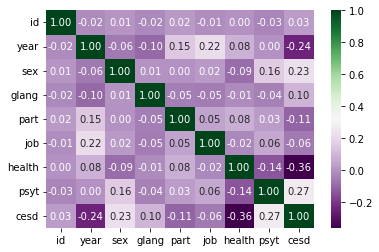

In [2]:
# Heatmap of categorical variables
import seaborn as sb

categorical = data_all[['id', 'year', 'sex', 'glang', 
                        'part', 'job', 'health', 'psyt', 'cesd']].copy()
dataplot = sb.heatmap(categorical.corr(), cmap = 'PRGn', annot=True, fmt=".2f")

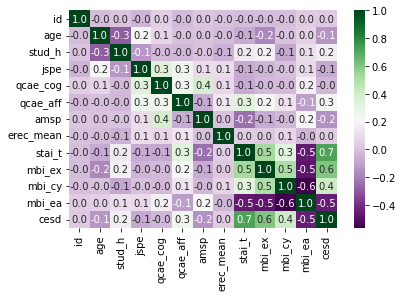

In [3]:
# Heatmap of numeric variables
numeric = data_all[['id', 'age', 'stud_h', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 
                    'erec_mean', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea', 'cesd']].copy()
dataplot = sb.heatmap(numeric.corr(), cmap = 'PRGn', annot=True, fmt=".1f")

In [4]:
# Creating a dataframe of the correlation coefficients of each variable and cesd
df = data_all.corr()
df = df[["cesd"]]
df['cesd'] = df['cesd'].abs()
df = df.sort_values(by = ["cesd"], ascending = False)
df.head(5)

,cesd
cesd,1.000000
stai_t,0.715728
mbi_ex,0.605617
mbi_ea,0.453589
mbi_cy,0.407727


The selected variables are stai_t, mbi_ex, and mbi_ea. All are survey scores meant to serve as proxies of someone's mental health. The first is the student's score on the State-Trait Anxiety Inventory. The other two are different instruments from the Maslach Burnout Inventory, mbi_ex measuring emotional exhaustion and mbi_ea measuring academic efficacy. 

In [5]:
# Creating dataset to use for model
data = data_all[['stai_t', 'mbi_ex', 'mbi_ea', 'cesd']].copy()
data.head()

,stai_t,mbi_ex,mbi_ea,cesd
0,61,17,20,34
1,33,14,26,7
2,73,24,23,25
3,48,16,21,17
4,46,22,23,14


## 3. Exploring The Data <a id="exploring_data"></a>

### 3.1: Univariate Exploration of Variables

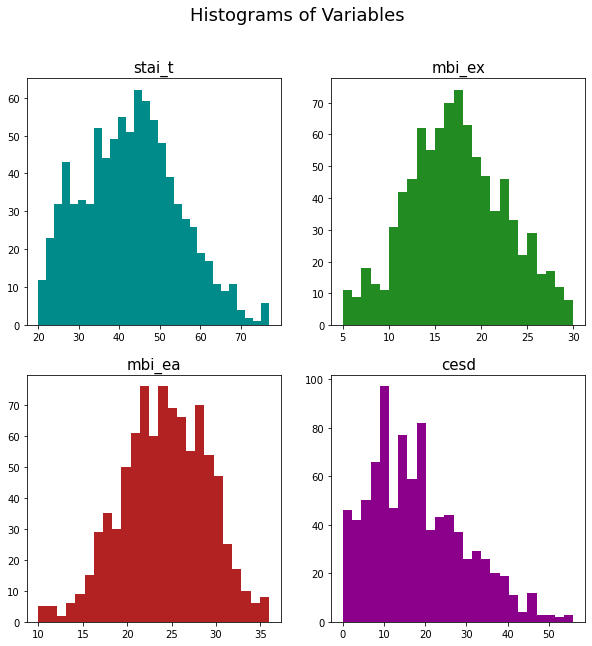

In [6]:
# Histograms of each variable
w = data['stai_t']
x = data['mbi_ex']
y = data['mbi_ea']
z = data['cesd']

# Creating the histograms
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

plots, axis = plt.subplots(2, 2, figsize=(10, 10))

# stai_t
axis[0, 0].hist(w, bins = 29, color = 'darkcyan')
axis[0, 0].set_title('stai_t', fontsize = 15)

# mbi_ex
axis[0, 1].hist(x, bins = 25, color = 'forestgreen')
axis[0, 1].set_title('mbi_ex', fontsize = 15)

# mbi_ea
axis[1, 0].hist(y, bins = 25, color = 'firebrick')
axis[1, 0].set_title('mbi_ea', fontsize = 15)

# cesd
axis[1, 1].hist(z, bins = 25, color = 'darkmagenta')
axis[1, 1].set_title('cesd', fontsize = 15)

# Title 
plt.suptitle('Histograms of Variables',fontsize = 18)

# Show the plot
plt.show()


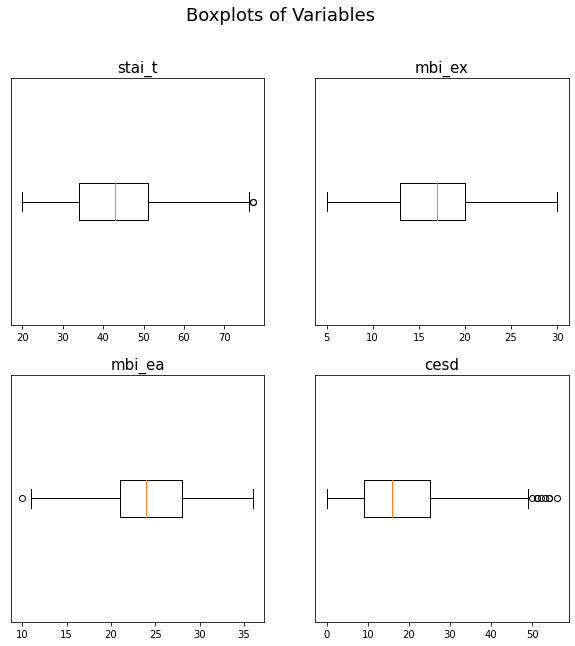

In [7]:
# Checking if outliers exist with boxplots 

w = data['stai_t']
x = data['mbi_ex']
y = data['mbi_ea']
z = data['cesd']

plots, axis = plt.subplots(2, 2, figsize=(10, 10))

# stai_t
axis[0,0].boxplot(w, vert = False)
axis[0,0].set_title('stai_t', fontsize = 15)
axis[0,0].yaxis.set_tick_params(labelleft=False)
axis[0,0].set_yticks([])

# mbi_ex
axis[0,1].boxplot(x, vert = False)
axis[0,1].set_title('mbi_ex', fontsize = 15)
axis[0,1].yaxis.set_tick_params(labelleft=False)
axis[0,1].set_yticks([])

# mbi_ea
axis[1,0].boxplot(y, vert = False)
axis[1,0].set_title('mbi_ea', fontsize = 15)
axis[1,0].yaxis.set_tick_params(labelleft=False)
axis[1,0].set_yticks([])

# cesd
axis[1,1].boxplot(z, vert = False)
axis[1,1].set_title('cesd', fontsize = 15)
axis[1,1].yaxis.set_tick_params(labelleft=False)
axis[1,1].set_yticks([])

plt.suptitle('Boxplots of Variables',fontsize = 18)
plt.show()



In [8]:
# Function to identify outlier values in each variable
def outlier(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    list = []
    for i in x:
        if i < lower or i > upper:
            list.append(i)
    return list
            
# Printing outlier values
print('Outliers in stai_t: ', outlier(data['stai_t']),'\n',
      'Outliers in mbi_ex: ', outlier(data['mbi_ex']),'\n',
      'Outliers in mbi_ea: ', outlier(data['mbi_ea']),'\n',
      'Outliers in cesd: ', outlier(data['cesd']))

Outliers in stai_t:  [77, 77] 
 Outliers in mbi_ex:  [] 
 Outliers in mbi_ea:  [10] 
 Outliers in cesd:  [54, 52, 50, 51, 53, 51, 56, 54]


Given the outlier values, there is no reason to drop any from the dataset. None appear to be entry errors or errors of any other form. 

### 3.2: Multivariate Exploration of Variables 

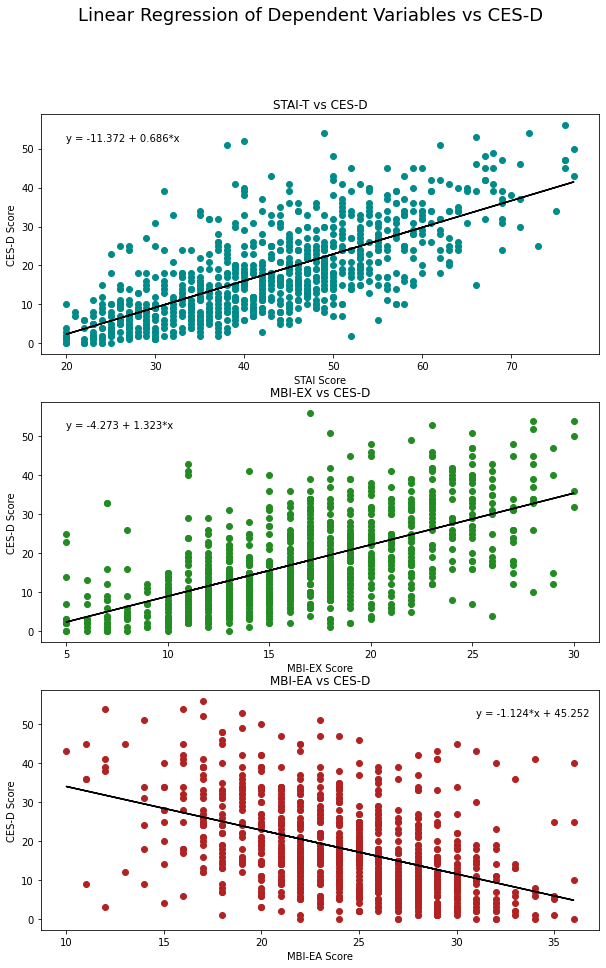

In [9]:
# Scatterplot comparing each independent variable to cesd
y = data['cesd']
w = data['stai_t']
x = data['mbi_ex']
z = data['mbi_ea']

plots, axis = plt.subplots(3, 1, figsize=(10, 15))

# stai_t vs cesd
import numpy as np
a, b = np.polyfit(w, y, 1) 
axis[0].plot(w, a*w+b, color = 'black')
axis[0].scatter(w,y, color = 'darkcyan') 
axis[0].set_title('STAI-T vs CES-D')
axis[0].set_xlabel('STAI Score')
axis[0].set_ylabel('CES-D Score')
text_w = 'y = ' + str(b.round(3)) + ' + ' + str(a.round(3)) + '*x'
axis[0].text(20, 52, text_w,  size = 10)

# mbi_ex vs cesd
c, d = np.polyfit(x, y, 1) 
axis[1].plot(x, c*x+d, color = 'black')
axis[1].scatter(x,y, color = 'forestgreen')
axis[1].set_title('MBI-EX vs CES-D')
axis[1].set_xlabel('MBI-EX Score')
axis[1].set_ylabel('CES-D Score')
text_x = 'y = ' + str(d.round(3)) + ' + ' + str(c.round(3)) + '*x'
axis[1].text(5, 52, text_x,  size = 10)

# mbi_ea vs cesd
e, f = np.polyfit(z, y, 1) 
axis[2].plot(z, e*z+f, color = 'black')
axis[2].scatter(z,y, color = 'firebrick') 
axis[2].set_title('MBI-EA vs CES-D')
axis[2].set_xlabel('MBI-EA Score')
axis[2].set_ylabel('CES-D Score')
text_z = 'y = ' + str(e.round(3)) + '*x' + ' + ' + str(f.round(3))
axis[2].text(31, 52, text_z,  size = 10)

plt.suptitle('Linear Regression of Dependent Variables vs CES-D',fontsize = 18)
plt.show()

## 4. The Model <a id="model"></a>

### 4.1: Building the Multiple Linear Regression model



In [10]:
# Creating features and label
x_copy = data.drop(['cesd'], axis = 1)
y_copy = data['cesd'].values.copy()

# Creating test-split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_copy, y_copy, train_size = 0.80, random_state = 1)

# Forming linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

# Predicting values
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

### 4.2: Evaluating model performance

In [11]:
# Calculating Mean Square Error (MSE) and R-squared of predictions
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Saving perfomance indicators to a dataframe
indicators = pd.DataFrame(['Lin. Reg.', train_mse, train_r2, test_mse, test_r2]).transpose()
indicators.columns = ['Model', 'Training MSE', 'Training R-squared', 'Test MSE', 'Test R-squared']
print(indicators)

       Model Training MSE Training R-squared   Test MSE Test R-squared
0  Lin. Reg.    53.472073           0.596949  58.922015       0.537513


### 4.3: Visualizing model performance 

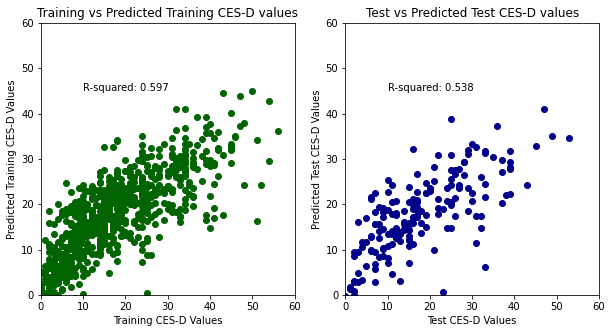

In [12]:
# Scatter plot comparing the model's predicted cesd vailues with their true values
plots, axis = plt.subplots(1, 2, figsize=(10, 5))


# Training vs Predicted Training Values
axis[0].scatter(y_train, y_train_pred, color = 'darkgreen') 
axis[0].set_title('Training vs Predicted Training CES-D values')
axis[0].set_xlabel('Training CES-D Values')
axis[0].set_xlim(0,60)
axis[0].set_ylabel('Predicted Training CES-D Values')
axis[0].set_ylim(0,60)
train_text = 'R-squared: ' + str(train_r2.round(3))
axis[0].text(10, 45, train_text,  size = 10)

# Test vs Predicted Test Values
axis[1].scatter(y_test, y_test_pred, color = 'darkblue') 
axis[1].set_title('Test vs Predicted Test CES-D values')
axis[1].set_xlabel('Test CES-D Values')
axis[1].set_xlim(0,60)
axis[1].set_ylabel('Predicted Test CES-D Values')
axis[1].set_ylim(0,60)
test_text = 'R-squared: ' + str(test_r2.round(3))
axis[1].text(10, 45, test_text,  size = 10)
plt.show()

## 5. Conclusion <a id="conclusion"></a>

In both the training and test data, the model did a mediocre job of predicting CES-D values. Neither had a R-squared value above 0.60. As the value of CES-D increased, the worse the model did at predicting the true score. There are two reasons I find this to be most likely. The first is that there was not as much data with higher values, so the model had less to work with. Also, it is likely that a linear model is not the best way to represent the data. A quadratic or log model may have yielded better results. As my understanding of machine learning improves, I would like to experiment with different algorithms and work with larger datasets. Creating an accurate model with less than 1,000 data points is difficult. 

## 6. Appendix <a id="appendix"></a>

### Appendix 1: Dataset <a id="appendix_1"></a>

In [13]:
pd.set_option('display.max_rows', None)
data_all

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
5,14,26,5,2,1,1,1,10,2,0,102,48,37,17,0.690476,14,56,18,15,18
6,17,23,5,2,1,1,0,15,3,0,117,58,38,23,0.714286,45,56,28,17,16
7,21,23,4,1,1,1,1,8,4,0,118,65,40,32,0.880952,6,36,11,10,27
8,23,23,4,2,1,1,1,20,2,0,118,69,46,23,0.666667,43,43,26,21,22
9,24,22,2,2,1,1,0,20,5,0,108,56,36,22,0.690476,11,43,18,6,23
